In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [34]:
#4 clusters and 3000 dots
x,cluster_number=make_blobs(n_samples=3000,centers=4)

In [35]:
x

array([[ -6.11611244,  -2.48761091],
       [  4.51039881,  -1.36830773],
       [  1.27953461,  -3.91327206],
       ...,
       [-10.39500589,  -2.04447637],
       [ -7.45228689,  -0.96144916],
       [ -8.36167229,  -2.66480556]])

In [42]:
cluster_number

array([2, 0, 2, ..., 1, 0, 0])

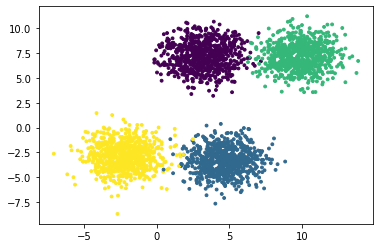

In [46]:
x,cluster_number=make_blobs(n_samples=3000,centers=4,random_state=2697,cluster_std=1.3)

plt.scatter(x[:,0],x[:,1],s=8,c=cluster_number)
plt.show()

In [64]:
from sklearn.cluster import KMeans

In [99]:
kmeans_model=KMeans(n_clusters=5)

In [100]:
kmeans_model.fit(x)

KMeans(n_clusters=5)

In [101]:
y_kmeans=kmeans_model.predict(x)

In [102]:
y_kmeans

array([3, 1, 3, ..., 2, 1, 1])

In [103]:
kmeans_model.cluster_centers_

array([[-2.22614963, -2.91571929],
       [ 2.25933477,  7.29628042],
       [ 4.66578035, -3.35399233],
       [ 9.90668745,  7.21595331],
       [ 4.63905398,  7.10181756]])

In [104]:
centers=kmeans_model.cluster_centers_

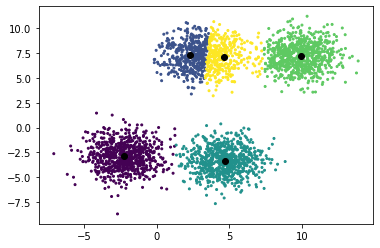

In [105]:
plt.scatter(x[:,0],x[:,1],s=4,c=y_kmeans)
plt.scatter(centers[:,0],centers[:,1],c="black")
plt.show()

# How to find out the correct number of clusters

In [108]:
from scipy.spatial.distance import cdist

In [109]:
cdist

<function scipy.spatial.distance.cdist(XA, XB, metric='euclidean', *args, **kwargs)>

In [110]:
distortions=[]

In [111]:
type(distortions)

list

In [116]:
K=range(2,15)

In [119]:
kmeans=KMeans()

In [124]:
for k in K:
    kmeansmodel=KMeans(n_clusters=k).fit(x)
    kmeansmodel.fit(x)
    distortions.append(sum(np.min(cdist(x,kmeansmodel.cluster_centers_,"euclidean"),axis=1))/x.shape[0])

In [127]:
K

range(2, 15)

In [128]:
distortions

[3.644958304553115,
 2.6031258415876373,
 1.6565557813076077,
 1.5734093096610327,
 1.4827740131520968,
 1.4101127080073008,
 1.3303379525177121,
 1.2738990761274658,
 1.2147797790992219,
 1.1577671664735831,
 1.10217943216884,
 1.063144991702464,
 1.0323013428281331]

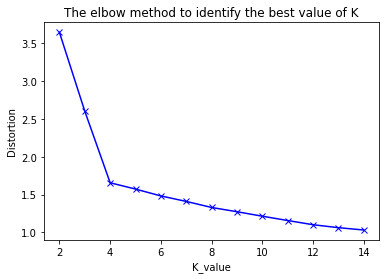

In [129]:
#Plotting the elbow graph

plt.plot(K,distortions,"bx-")
plt.xlabel("K_value")
plt.ylabel("Distortion")
plt.title("The elbow method to identify the best value of K")

plt.show()